<a href="https://colab.research.google.com/github/hkaido0718/IncompleteDiscreteChoice/blob/main/Ex_OrderedChoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordered choice with control function

Consider the following ordered choice problem.
\begin{align}
Y&=\begin{cases}
0 & \text{if}~ \mu(D,X)+U \le c_{L}\\
1 & \text{if}~ c_L< \mu(D,X)+U \le c_{U}\\
2 & \text{if}~ \mu(D,X)+U > c_U,
\end{cases}
\end{align}
where $D$ is a binary treatment,  $X$ is a vector of controls, and $U$ is a latent variable. Suppose that $D$ is potentially endogenous. It is generated according to
$$ D=1\{\pi(Z,X)\ge V\},$$
for a continuous variable $V$. For simplicity, we normalize the distribution of $V|Z,X$ to the uniform distribution over $[0,1]$.

Suppose that $U$ is independent of $D$ conditional on $(X,V)$. Hence, we could take a control function approach if $V$ can be recovered from the observables. However, this is not feasible because the selection equation is not invertible in $V$. We can instead recover the following _set-valued control function_:
\begin{align}
\mathbf V(D,Z,X)=\begin{cases}
[\pi(Z,X),1]&\text{ if }D=0\\
[0,\pi(Z,X)]&\text{ if }D=1.
\end{cases}
\end{align}


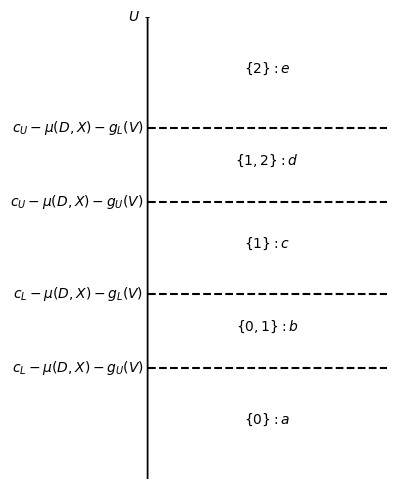

In [ ]:
import matplotlib.pyplot as plt

# Set the scale for the figure
scale = 0.6
fig, ax = plt.subplots(figsize=(6 * scale, 10 * scale))

# Draw the y-axis
ax.arrow(0, 0, 0, 10, head_width=0.1, head_length=0.3, fc='black', ec='black')
ax.text(-0.5, 10, r'$U$', va='center')

# Draw the dashed lines
dashed_lines_y = [2.4, 4, 6, 7.6]
for y in dashed_lines_y:
    ax.plot([0, 6], [y, y], 'k--')

# Add text labels
ax.text(3, 1.2, r'$\{0\} : a$', ha='center')
ax.text(3, 3.2, r'$\{0,1\} : b$', ha='center')
ax.text(3, 5, r'$\{1\} : c$', ha='center')
ax.text(3, 6.8, r'$\{1,2\} : d$', ha='center')
ax.text(3, 8.8, r'$\{2\} : e$', ha='center')

# Add the specific text annotations next to the dashed lines
ax.text(-0.1, 7.6, r'$c_U -\mu(D,X)-g_L(V)$', va='center', ha='right')
ax.text(-0.1, 6, r'$c_U-\mu(D,X)- g_U(V)$', va='center', ha='right')
ax.text(-0.1, 4, r'$c_L -\mu(D,X)-g_L(V)$', va='center', ha='right')
ax.text(-0.1, 2.4, r'$c_L -\mu(D,X)-g_U(V)$', va='center', ha='right')

# Adjust the plot limits and remove the x-axis
ax.set_xlim(-1, 6)
ax.set_ylim(0, 10)
ax.axis('off')

plt.show()


# Graph representation

Let's convert the model prediction into a graph.
We define the $U$-nodes as follows
\begin{align}
a&\equiv \{U:G(U|X;\theta)=\{0\}\}\\
b&\equiv \{U:G(U|X;\theta)=\{0,1\}\}\\
c&\equiv \{U:G(U|X;\theta)=\{1\}\}\\
d&\equiv \{U:G(U|X;\theta)=\{1,2\}\}\\
e&\equiv \{U:G(U|X;\theta)=\{2\}\}.
\end{align}
We use the BipartiteGraph class imported from the idc library.

In [ ]:
!git clone https://github.com/hkaido0718/IncompleteDiscreteChoice.git

Cloning into 'IncompleteDiscreteChoice'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 55 (delta 22), reused 46 (delta 13), pack-reused 0
Receiving objects: 100% (55/55), 27.92 KiB | 5.58 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
import IncompleteDiscreteChoice.idclib as idc

# Define the Y-nodes and U-nodes
Y_nodes = [0, 1, 2]
U_nodes = ['a', 'b', 'c', 'd', 'e']

# Add edges between nodes
edges = [
    ('a', 0),
    ('b', 0),
    ('b', 1),
    ('c', 1),
    ('d', 1),
    ('d', 2),
    ('e', 2)
]

# idc library has a class BipartiteGraph to store your model
gmodel = idc.BipartiteGraph(Y_nodes, U_nodes, edges)

Let's plot the graph.

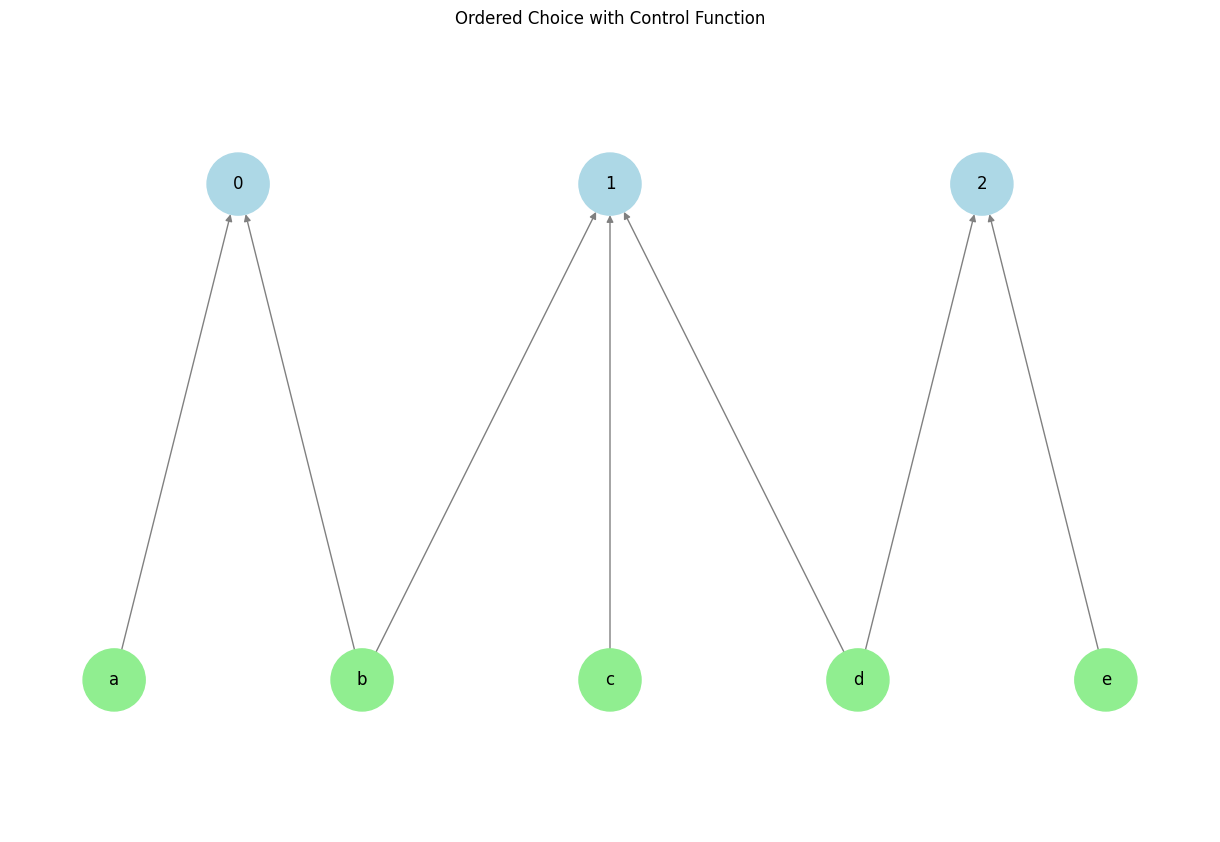

In [ ]:
# Define positions for the nodes
pos = {
    0: (-1.5, 2), 1: (0, 2), 2: (1.5, 2),  # Y-nodes on the top row
    'a': (-2, 0), 'b': (-1, 0), 'c': (0, 0), 'd': (1, 0), 'e': (2, 0)  # U-nodes on the bottom row
}

# Plot the graph using the new method
gmodel.plot_graph(pos, title='Ordered Choice with Control Function')


Let's calculate the sharp identifying restrictions. For simplicity, we assign the following probabilities over the $U$-nodes:
$(F_\theta(a),F_\theta(b),F_\theta(c),F_\theta(d),F_\theta(e))=(0.1, 0.2, 0.3, 0.15, 0.25)$.

In practice, it should be a function of $\theta=(\mu,g,F_\theta)$.

In [ ]:
import numpy as np

# Define probabilities for the U-nodes
Ftheta = np.array([0.1, 0.2, 0.3, 0.15, 0.25])  # Example probabilities corresponding to U_nodes

# Use the calculate_sharp_lower_bound to calculate probabilities.
results,sharp_lower_bounds = gmodel.calculate_sharp_lower_bound(Ftheta)
idc.print_table(results)




Subset of Y-nodes        Exclusive U-nodes             Sharp Lower Bound  
{0}                      {'a'}                         0.10               
{1}                      {'c'}                         0.30               
{2}                      {'e'}                         0.25               
{0, 1}                   {'c', 'a', 'b'}               0.60               
{0, 2}                   {'e', 'a'}                    0.35               
{1, 2}                   {'c', 'e', 'd'}               0.70               
{0, 1, 2}                {'b', 'c', 'a', 'e', 'd'}     1.00               


# References:

- Han and Kaido (2024): "Set-valued Control Functions" [arXiv:2403.00347](https://doi.org/10.48550/arXiv.2403.00347)